In [1]:
import cv2
import os

from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(40,40))

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

In [2]:
import numpy as np

In [ ]:
path = '../training/training/n0/n0018.jpg'

In [ ]:
img = cv2.imread(path, 0)

In [ ]:
plt.imshow(img)

In [ ]:
img

In [ ]:
img1 = img.flatten(order='C')/255

In [ ]:
img1

In [ ]:
# function f = WX + b

In [ ]:
W = np.random.rand(100, 10)

In [ ]:
def costFunction(y_true, y_pred):
    # find the y_pred value for the actual image index
    index = np.where(1)
    cost = 0
    for i in range(len(y_true)):
        if i != index:
            cost+= max(0, y_pred[i] - y_pred[index] + 1)
    return cost

def objective(params):
    y_pred = np.matmul(params[0],X) + params[1]
    
#     print(y_pred)
    loss = []

    for y_t, y_p in zip(y_true, y_pred):
        print(y_t, y_p)
        loss.append(costFunction(y_t, y_p))
    
    return sum(loss)/len(loss)

In [ ]:
W = np.random.rand(3, 4)
B = np.random.rand(3, 3)

X = np.random.rand(4, 3)
classes = np.array([0,1,2])

In [ ]:
np.matmul(W,X) + B

In [ ]:
y_true = np.zeros((classes.size, classes.max()+1))
y_true[np.arange(classes.size), classes] = 1

In [ ]:
y_true

In [ ]:
objective(params=[W,B])

In [ ]:
y_true = [1,0,0]
y_pred = [3.2, 5.1, -1.7]

y_true = [0,1,0]
y_pred = [1.3, 4.9, 2.0]

y_true = [0,0,1]
y_pred = [2.2, 2.5, -3.1]

costFunction(y_true, y_pred)

In [ ]:
y_true = [[1,0,0], [0,1,0], [0,0,1]]
y_pred = [[3.2, 5.1, -1.7], [1.3, 4.9, 2.0], [2.2, 2.5, -3.1]]

loss = []

for y_t, y_p in zip(y_true, y_pred):
    loss.append(costFunction(y_t, y_p))

sum(loss)/len(loss)

In [35]:
from scipy.optimize import minimize

In [ ]:
initial_guess = [W,B]

minimize(objective, initial_guess)

In [ ]:
image_height = 6
image_width = 8

No_of_Images = 10
No_of_Classes = 3

classes = np.random.randint(No_of_Classes, size=No_of_Images)
y_true = np.zeros((classes.size, classes.max()+1))
y_true[np.arange(classes.size), classes] = 1

def costFunction(y_true, y_pred):
    # find the y_pred value for the actual image index
    index = np.where(1)
    cost = 0
    for i in range(len(y_true)):
        if i != index:
            cost+= max(0, y_pred[i] - y_pred[index] + 1)
    return cost

def objective(params):
    
    W = params[:No_of_Classes*image_height*image_width].reshape(No_of_Classes, image_height*image_width)
    B = params[No_of_Classes*image_height*image_width:].reshape(No_of_Classes, No_of_Images)
    y_pred = np.matmul(W,X) + B
    
#     print(y_pred)
    loss = []
#     return y_pred

    for y_t, y_p in zip(y_true, y_pred.T):
#         print(y_t, y_p)
        loss.append(costFunction(y_t, y_p))
    
    return sum(loss)/len(loss)

    

In [ ]:
classes

In [ ]:
X = np.random.rand(image_height*image_width, No_of_Images)

In [ ]:
W = np.random.rand(No_of_Classes, image_height*image_width)
B = np.random.rand(No_of_Classes, No_of_Images)

In [ ]:
print('X matrix shape: ', X.shape)
print('Wight matrix shape: ', W.shape)
print('Bias matrix shape: ', B.shape)

In [ ]:
param = np.append(W.ravel(), B.ravel())
X_array = minimize(objective, param)

In [ ]:
W_best = X_array.x[:No_of_Classes*image_height*image_width].reshape(No_of_Classes, image_height*image_width)
B_best = X_array.x[No_of_Classes*image_height*image_width:].reshape(No_of_Classes, No_of_Images)

In [ ]:
preds = np.matmul(W_best, X) + B_best

In [ ]:
preds.T[6]

In [ ]:
classes

In [15]:
images = []
labels = []
count = 0
for root, dirs, files in os.walk("../training/training/n0", topdown=False):
    for name in files:
#         print(os.path.join(root, name))
        images.append(os.path.join(root, name))
        labels.append(0)
#     for name in dirs:
#         print(os.path.join(root, name))
        count += 1
        if count > 60:
            break

In [16]:
count = 0
for root, dirs, files in os.walk("../training/training/n1", topdown=False):
    for name in files:
#         print(os.path.join(root, name))
        images.append(os.path.join(root, name))
        labels.append(1)
        count += 1
        if count > 60:
            break

In [17]:
count = 0
for root, dirs, files in os.walk("../training/training/n2", topdown=False):
    for name in files:
#         print(os.path.join(root, name))
        images.append(os.path.join(root, name))
        labels.append(2)
        count += 1
        if count > 60:
            break

In [3]:
def readImage(path, width=56, height=60):
    # Using cv2.imread() method
    # Using 0 to read image in grayscale mode
    img = cv2.imread(path, 0)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

    return resized

In [ ]:
len(images)

In [18]:
files = images

In [ ]:
zig = np.array([0,0,1])
max(zig)
inbdex = np.where(zig == max(zig))

zig[inbdex]

In [43]:
image_height, image_width = 60, 60

No_of_Images = len(labels)
No_of_Classes = len(set(labels))

# classes = np.random.randint(No_of_Classes, size=No_of_Images)
classes = np.array(labels)
y_true = np.zeros((classes.size, classes.max()+1))
y_true[np.arange(classes.size), classes] = 1

def objective(params):
    
    W = params[:No_of_Classes*image_height*image_width].reshape(No_of_Classes, image_height*image_width)
    B = params[No_of_Classes*image_height*image_width:].reshape(No_of_Classes, No_of_Images)
    y_pred = np.matmul(W,X) + B
    
    indices = np.where(y_true == np.amax(y_true))
    new = y_true - y_pred.T
    new[indices] = 0
    return sum(sum(new))#/len(new)

# def objective(params):
    
#     W = params[:No_of_Classes*image_height*image_width].reshape(No_of_Classes, image_height*image_width)
#     B = params[No_of_Classes*image_height*image_width:].reshape(No_of_Classes, No_of_Images)
#     y_pred = np.matmul(W,X) + B
    
# #     print(y_pred)
#     loss = []
# #     return y_pred

#     for y_t, y_p in zip(y_true, y_pred.T):
# #         print(y_t, y_p)
#         loss.append(costFunction(y_t, y_p))
    
#     return sum(loss)

In [44]:
img = readImage(files[0], )

In [45]:
result = np.where(y_true == np.amax(y_true))

result[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [46]:
y_pred = np.matmul(W,X) + B

In [ ]:
new = y_true - y_pred.T
new[result] = 0

sum(sum(new))

In [21]:
W = np.random.rand(No_of_Classes, image_height*image_width)
B = np.random.rand(No_of_Classes, No_of_Images)

In [22]:
X = []

for i in files:
    X.append(readImage(i, width = image_width, height=image_height).ravel())

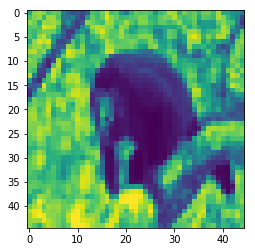

In [24]:
plt.imshow(X[2].reshape(image_width, image_height))

In [25]:
len(X)

183

In [26]:
X = np.array(X)

In [27]:
X = X.T

In [28]:
X.shape

(2025, 183)

In [29]:
W.shape

(3, 2025)

In [30]:
B.shape

(3, 183)

In [33]:
param = np.append(W.ravel(), B.ravel())
objective(param)

-40704567.70422293

In [36]:
param = np.append(W.ravel(), B.ravel())
X_array = minimize(objective, param, options={'disp': True})

Optimization terminated successfully.
         Current function value: -5138671714602.300781
         Iterations: 2
         Function evaluations: 86138
         Gradient evaluations: 13


In [37]:
W_best = X_array.x[:No_of_Classes*image_height*image_width].reshape(No_of_Classes, image_height*image_width)
B_best = X_array.x[No_of_Classes*image_height*image_width:].reshape(No_of_Classes, No_of_Images)

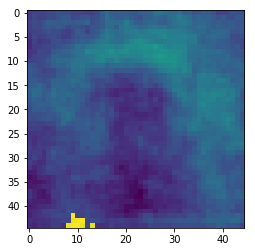

In [38]:
plt.imshow(W_best[0].reshape(image_height, image_width))

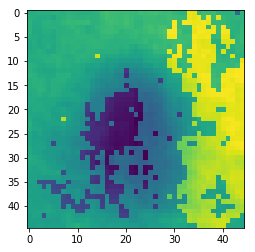

In [40]:
plt.imshow(W_best[1].reshape(image_height, image_width))

In [41]:
preds = np.matmul(W_best, X) + B_best
preds = preds.T

In [42]:
for p in preds:
    print(np.where(max(p)))

(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array([0]),)
(array

In [ ]:
param_best = np.append(W_best.ravel(), B_best.ravel())
objective(param_best)

In [ ]:
W = np.array([[0.2, -0.5, 0.1, 2.0], 
             [1.5, 1.3, 2.1, 0.0],
              [0, 0.25, 0.2, -0.3]
             ])
X = np.array([
    [56],
    [231],
    [24],
    [2]
])

B = np.array([
    [1.1], 
    [3.2],
    [-1.2]
])

image_height, image_width = 4, 1

No_of_Images = 1
No_of_Classes = 3

# classes = np.random.randint(No_of_Classes, size=No_of_Images)
classes = np.array(2)
y_true = np.zeros((classes.size, classes.max()+1))
y_true[np.arange(classes.size), classes] = 1
y_true = y_true[0]

def objective(params):
    
    W = params[:No_of_Classes*image_height*image_width].reshape(No_of_Classes, image_height*image_width)
    B = params[No_of_Classes*image_height*image_width:].reshape(No_of_Classes, No_of_Images)
    y_pred = np.matmul(W,X) + B
    
    index = np.where(y_true == max(y_true))
    new = (y_true - y_pred.T)
    new[0][index] = 0
    return np.sum(new)#/len(new)

param = np.append(W.ravel(), B.ravel())
objective(param)

In [ ]:
classes = np.array(0)
y_true = np.zeros((classes.size, classes.max()+1))
y_true[np.arange(classes.size), classes] = 1

In [ ]:
new = np.array([[  96.8, -437.9, -59.75]])

In [ ]:
new[0][2]

In [ ]:
np.where(y_true == max(y_true))

In [ ]:
max(y_true[0])

In [146]:
W = np.array([
    [0.2, -0.5, 0.1, 2.0, 1.1], 
    [1.5, 1.3, 2.1, 0.0, 3.2], 
    [0, 0.25, 0.2, -0.3, -1.2]
])

# x = np.array([
#     [56], [32],
#     [231], [98],
#     [24], [84],
#     [2],[126],
#     [1], [1]
# ])

x = np.array([
    [56, 32],
    [231, 98],
    [24, 84],
    [2, 126],
    [1, 1]
])

y_pred = np.matmul(W,x)

In [193]:
y_pred.shape

(3, 2)

In [147]:
y_pred

array([[-96.8 , 218.9 ],
       [437.9 , 355.  ],
       [ 60.75,   2.3 ]])

In [154]:
der_W = np.zeros(3*5).reshape(3, 5)
No_of_images = 2

for i in range(No_of_images):
    for y_p in y_pred[:,i]:
        for j in range(len(y_p)):
            if y_p[i][j] - y_pred[i][y_j] > 1:
                if i == y_j:
                    der_W[i][j] -= x[j][0]
                else:
                    der_W[i][j] += x[j][0]
                    
der_W

TypeError: object of type 'numpy.float64' has no len()

In [167]:
y_pred[2]

array([60.75,  2.3 ])

In [168]:
y_pred[:,1]

array([218.9, 355. ,   2.3])

In [172]:
loss = 0
y_true = [0, 2]

for i in range(len(y_true)):
    for j in range(len(y_pred[:,i])):
        if j != y_true[i]:
            loss+=max(0, y_pred[:,i][j] - y_pred[:,i][y_true[i]] + 1)
            
loss

1265.55

In [188]:
# der_w dimension is No_of_Classes*(img_height*image_width + image_width)

der_W = np.zeros(3*5).reshape(3, 5)
# for i in range(len(y_pred)):
for i in range(len(y_true)):
    for j in range(len(y_pred[:,i])):
        for k in range(5):
            if y_pred[:,i][j] - y_pred[:,i][y_true[i]] > 1:
                if j == y_true[i]:
                    der_W[j][k] -= x[k][i]
                else:
                    der_W[j][k] += x[k][i]

In [190]:
der_W

array([[ 32.,  98.,  84., 126.,   1.],
       [ 88., 329., 108., 128.,   2.],
       [ 56., 231.,  24.,   2.,   1.]])

In [191]:
der_W[][:]

SyntaxError: invalid syntax (<ipython-input-191-11d66c64c8b0>, line 1)

In [102]:
x[]

array([[  0.,   0.,   0.,   0.,   0.],
       [255., 255., 255., 255., 255.],
       [ 24.,  24.,  24.,  24.,  24.]])